In [2]:
%run 0.0_Dependance.ipynb

In [20]:
df = pd.read_csv("train.csv",index_col=0)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i]= le.fit_transform(df[i])

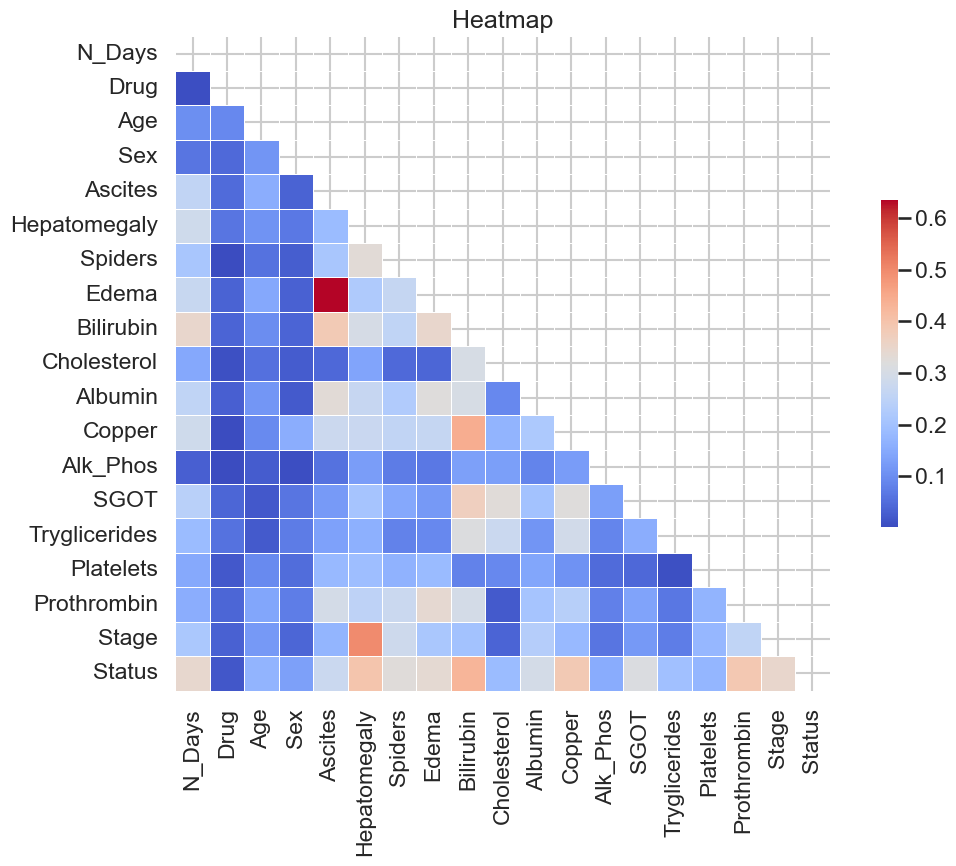

In [26]:
sns.set_theme(context='talk', style='whitegrid')  # Le contexte 'talk' est mieux pour les grands graphiques


f, ax = plt.subplots(figsize=(12, 9))

# masque pour le triangle supérieur
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Configurer la heatmap
sns.heatmap(
    np.abs(df.corr()),  
    annot=False,        
    linewidths=.5,      
    ax=ax,              
    mask=mask,          
    cbar_kws={"shrink": .5},  
    square=True,        # Forcer les cellules à être carrées
    cmap='coolwarm'     # Utiliser une carte de couleurs divergente
)

plt.title("Heatmap")
plt.xticks(rotation=90)  
plt.yticks(rotation=0)               
plt.tight_layout()                  
plt.show()                           

In [23]:
Status = np.abs(df.corr().Status).sort_values(ascending=False)

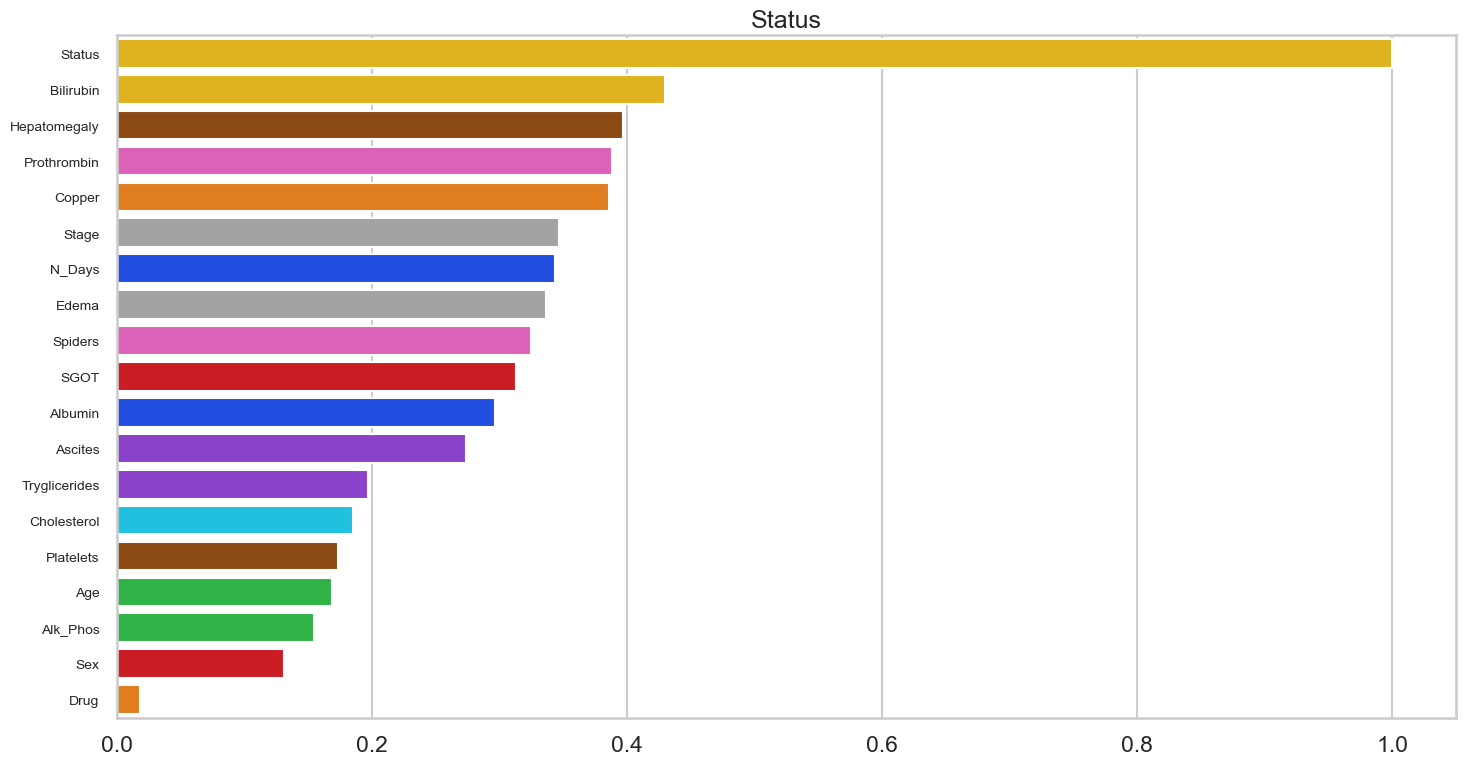

In [27]:
features = df.columns

# palette de couleurs avec une couleur distincte pour chaque feature.
palette = sns.color_palette("bright", len(features))

# Créez un dictionnaire pour mapper chaque feature à sa couleur dans la palette.
color_map = dict(zip(features, palette))


sns.set_theme(context='talk', style='whitegrid')

fig_size_width = 15
fig_size_height = 8  



f, ax = plt.subplots(figsize=(fig_size_width, fig_size_height))

sns.barplot(x=Status.values, y=Status.index, orient="h", ax=ax ,palette=color_map)
ax.set_title('Status')  
ax.tick_params(axis='y', labelsize=10)  # Réduction de la taille de la police 


plt.tight_layout()
plt.show()